In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#reading a data file
LoanDF=pd.read_csv("loan.csv")

<ipython-input-2-eaa7903245b2>:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  LoanDF=pd.read_csv("loan.csv")


In [ ]:
LoanDF.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
LoanDF.shape

(39717, 111)

In [ ]:
LoanDF.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

### data cleaning

In [ ]:
#counting null values in each column
nullcount=LoanDF.isnull().sum()

In [ ]:
#getting all the columns which has all the values as null
nullcount

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [ ]:
#filtering columns withall null values in it
all_null=nullcount[nullcount==39717]

In [ ]:
#displaying the columns with all null
all_null

mths_since_last_major_derog       39717
annual_inc_joint                  39717
dti_joint                         39717
verification_status_joint         39717
tot_coll_amt                      39717
tot_cur_bal                       39717
open_acc_6m                       39717
open_il_6m                        39717
open_il_12m                       39717
open_il_24m                       39717
mths_since_rcnt_il                39717
total_bal_il                      39717
il_util                           39717
open_rv_12m                       39717
open_rv_24m                       39717
max_bal_bc                        39717
all_util                          39717
total_rev_hi_lim                  39717
inq_fi                            39717
total_cu_tl                       39717
inq_last_12m                      39717
acc_open_past_24mths              39717
avg_cur_bal                       39717
bc_open_to_buy                    39717
bc_util                           39717


In [ ]:
##creating array of all null columns to drop
all_null_columns=all_null.index

In [ ]:
##dropping the null columns
LoanDF.drop(all_null_columns,axis=1,inplace=True)

In [ ]:
#checking the shape of new data
LoanDF.shape

(39717, 57)

In [ ]:
LoanDF.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [ ]:
LoanDF.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [ ]:
##finding % of null values in modified dataframe
percent_null=(LoanDF.isnull().sum()/len(LoanDF.index))*100

In [ ]:
percent_null

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [ ]:
##deleting the columns which has null values more than 15%
LoanDF.drop(['desc','mths_since_last_delinq','mths_since_last_record','next_pymnt_d'],axis=1,inplace=True)

In [ ]:
LoanDF.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [ ]:

LoanDF.shape

(39717, 53)

In [ ]:
all_columns=LoanDF.columns
all_columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [ ]:
##checking unique values in all columns
for i in all_columns:
    a=LoanDF[i].unique()
    print (i," ",a)

id   [1077501 1077430 1077175 ...   90395   90376   87023]
member_id   [1296599 1314167 1313524 ...   90390   89243   86999]
loan_amnt   [ 5000  2500  2400 10000  3000  7000  5600  5375  6500 12000  9000  1000
  3600  6000  9200 20250 21000 15000  4000  8500  4375 31825 12400 10800
 12500  9600  4400 14000 11000 25600 16000  7100 13000 17500 17675  8000
  3500 16425  8200 20975  6400 14400  7250 18000 35000 11800  4500 10500
 15300 20000  6200  7200  9500 18825 24000  2100  5500 26800 25000 19750
 13650 28000 10625  8850  6375 11100  4200  8875 13500 21600  8450 13475
 22000  7325  7750 13350 22475  8400 13250  7350 11500 29500  2000 11625
 15075  5300  8650  7400 24250 26000  1500 19600  4225 16500 15600 14125
 13200 12300  1400  3200 11875  1800 23200  4800  7300 10400  6600 30000
  4475  6300  8250  9875 21500  7800  9750 15550 17000  7500  5800  8050
  5400  4125  9800 15700  9900  6250 10200 23000 25975 21250 33425  8125
 18800 19200 12875  2625 11300  4100 18225 18500 16800  2200

In [ ]:
##dropping all column which has only one unique value as it will not give any insight
LoanDF.drop(['collections_12_mths_ex_med','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens','policy_code','initial_list_status','pymnt_plan'],axis=1,inplace=True)

In [ ]:
#checking duplicate values in id and member id
LoanDF.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [ ]:
LoanDF.shape

(39717, 44)

In [ ]:
##converting emp_length column values into numerical type
LoanDF.emp_length=LoanDF.emp_length.str.extract('(\d+)')

In [ ]:
LoanDF.emp_length.unique()

array(['10', '1', '3', '8', '9', '4', '5', '6', '2', '7', nan],
      dtype=object)

In [ ]:
##removing % symbol in interest rate so that we can perform numerical operations on it
LoanDF.int_rate=LoanDF.int_rate.str.rstrip('%')

In [ ]:
LoanDF.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


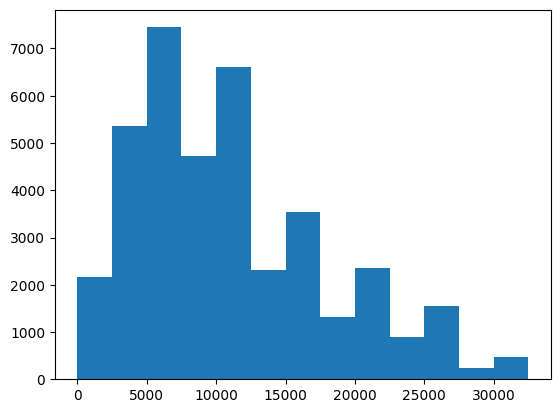

In [ ]:
###Plotting histogram of loan amount to get idea of frequecy of loan amount between a perticular range
plt.hist(LoanDF['loan_amnt'],bins=np.arange(0,35000,2500))
plt.show()

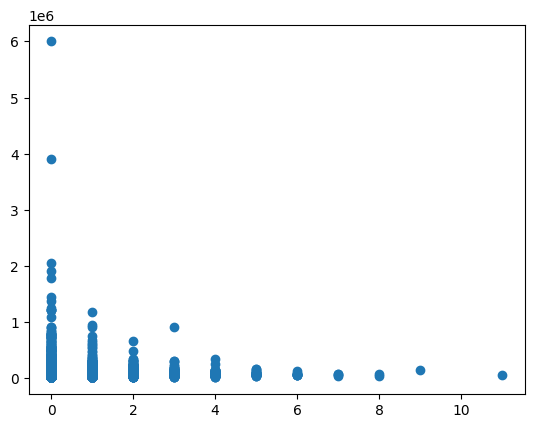

In [ ]:
plt.scatter(LoanDF.delinq_2yrs,LoanDF.annual_inc)
plt.show()

In [ ]:
LoanDF.shape

(39717, 44)

In [ ]:
LoanDF.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [ ]:
LoanDF.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [ ]:
#replacing 'NONE' values in home_ownership by 'OTHER'
(LoanDF.home_ownership=='NONE').sum()

0

In [ ]:
LoanDF.home_ownership.replace('NONE','OTHER',inplace=True)

In [ ]:
LoanDF.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

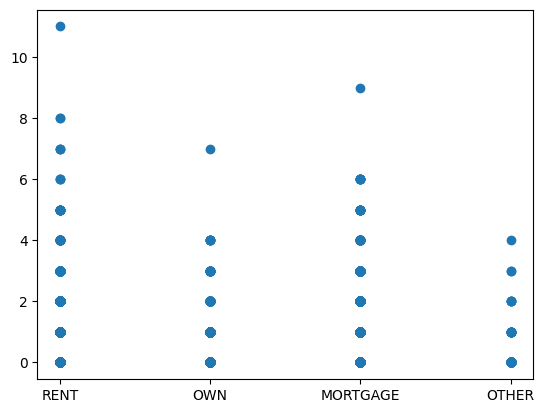

In [ ]:
plt.scatter(LoanDF.home_ownership, LoanDF.delinq_2yrs)
plt.show()

In [ ]:
LoanDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

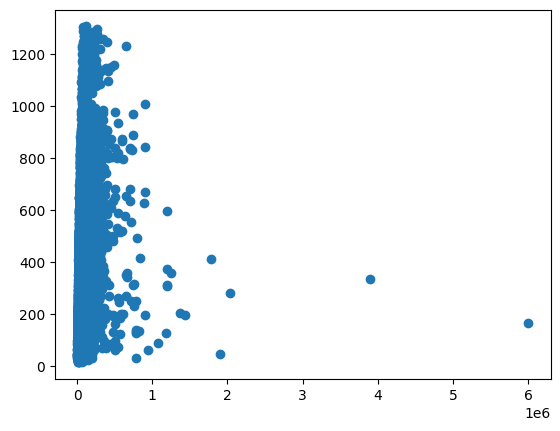

In [ ]:
plt.scatter(LoanDF.annual_inc,LoanDF.installment)
plt.show()

In [ ]:
LoanDF.describe().astype(int)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,...,39717,39717,39717,39717,39717,39717,39717,39717,39717,39020
mean,683131,850463,11219,10947,10397,324,68968,13,0,0,...,50,12153,11567,9793,2263,1,95,12,2678,0
std,210694,265678,7456,7187,7128,208,63793,6,0,1,...,373,9042,8942,7065,2608,7,688,148,4447,0
min,54734,70699,500,500,0,15,4000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25%,516221,666780,5500,5400,5000,167,40404,8,0,0,...,0,5576,5112,4600,662,0,0,0,218,0
50%,665665,850812,10000,9600,8975,280,59000,13,0,1,...,0,9899,9287,8000,1348,0,0,0,546,0
75%,837755,1047339,15000,15000,14400,430,82300,18,0,1,...,0,16534,15798,13653,2833,0,0,0,3293,0
max,1077501,1314167,35000,35000,35000,1305,6000000,29,11,8,...,6307,58563,58563,35000,23563,180,29623,7002,36115,2


In [ ]:
##categorising types of useful variables
unique_id=['id','member_id']
unordered_cat=['emp_title','home_ownership','verification_status','loan_status','purpose','title',]
continuous=['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','dti','inq_last_6mths','annual_inc','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_int','total_rec_prncp','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','pub_rec_bankruptcies']

In [ ]:
LoanDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [ ]:
LoanDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   